# Line Plots

We've already seen line plots a couple times, but they looked a lot like scatter plots.

A line plot is created with the `plot` function and renders a number of different series of data points and connects each point in a series with a line. Let's jump right in. 
So there are a couple of things which are new about this versus the scatter plots. 

- First, we only gave y-axes values to our plot call, no x axes values. Instead, the plot function was smart enough to figure out that what we wanted was to use the index of the series as the x value. Which is pretty handy when you want to make quick plots.
- Second we see that the plot identifies this as two series of data and that the colors of the data from the series are different including the data points and the lines between the data points. This is different from the scatter plot which required us to label the lines directly.

In [2]:
import matplotlib.pyplot as plt

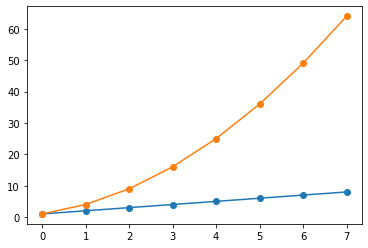

In [3]:
# We can use numpy to use a linear series of data points one through eight. We'll 
# also create a number of quadratically increasing values as the second series. 
# Remember that you can use broadcasting in numpy to do this efficiently.
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

# This time I'll use the mini formatting language to describe how I want the markers
# and lines to be rendered. The -o means to use a solid line with circle markers.
# Note that I'm passing the data followed by the formatting for each series, so
# we'll see the result as a two data series, the linear one at the bottom and the quadratic 
# one at the top.
plt.figure()
plt.plot(linear_data, '-o', exponential_data, '-o');

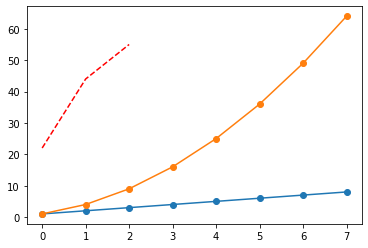

In [9]:
# It's pretty easy to extend this and add some arbitrary new line, this time I'll
# use --r which says to plot a dashed line in red.
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

Wait, did you notice what I did there? I didn't call `plt.figure()`! By default pyplot's scripting interface will call plt.gcf() when you try and do something. If no figure is defined, it will create a new one for you. The way JupyterLab is configured by default it will automatically close a figure after each cell is executed, so this means pyplot is going to create a new figure for us for each and every cell. This is a great time saver -- good by `plt.figure()`! 

We can use the regular axes functions creating labels for the axes and for the figure as a whole. And we can create a legend too. But since we didn't label the data points as we did with the scatter plot, we need to create legend entries when we add the legend itself.

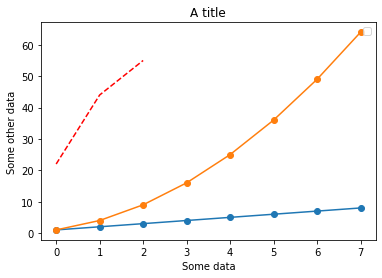

In [10]:
# Create some meaningful labels
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# Add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')
plt.plot([22,44,55], '--r');

This is a good time to introduce the *fill between* function of matplotlib. Now this function isn't specific to line plots, but you can see it commonly used with these plots, so I'll introduce it in this context. Let's imagine that we want to highlight the difference between the green and the blue curves. We could tell the Axes to paint a color between these series using the fill between function.

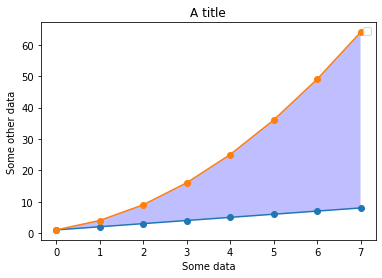

In [7]:
# Let's add our labels and legend just as before
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
plt.legend(['Baseline', 'Competition', 'Us'])
plt.plot(linear_data, '-o', exponential_data, '-o')

# Now we need to get the current axes object, and call fill_between. We didn't specify any x 
# values in our call to plot, so we'll just use the same range of data points it's already using. 
# Then we'll put in our lower bounds and our upper bounds along with the color we want painted 
# and for fun I'll include a transparency value. And that's all there is to it.
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

More likely you'll have a series of x values and y values which you're looking to plot. Often with line plots this comes in the form of date time on the x axes. Let's change our x axis to a series of eight date time instances in one day intervals.

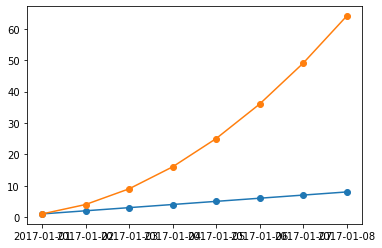

In [11]:
# I'll use the NumPy arrange function which you saw previously is really helpful to generate
# some sample dates for us. We can ask for an arrangement of dates at daily intervals just 
# by providing the start and end dates.
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

# We can now replot our linear and exponential data against this set of dates.
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

This produces a pretty decent looking figure with the data we want. But the dates overlap pretty heavily. Now, there's a couple of things that we could do here. For instance, everything is from 2017. So we could iterate through and change the labels by stripping the year, and then add an x axis label which clarifies that it's all for the year of 2017. This is pretty reasonable, but I wanted to show you a couple of features of how matplotlib uses text instead.

There are lots of interesting properties of the axes object and you should use some them in the assignment. For instance; you can get the grid lines, the tick locations for both major and minor ticks and so on. Just like all artists, an axes has a bunch of children which are themselves artists. In fact, if you're are following along in the JupyterLab notebook with this lecture why don't you just pause the video and run the `rec_gc` function we wrote earlier to explore what kind of artists the x axes object actually contains.

What I want to show you though, is that you can access the text of the tics using the get tick labels function. Each of the tick labels are a text object which itself is an artist. This means that you can use a number of different artist functions and one specific to text is the set rotation function which changes the rotation based on degrees. Let's iterate through the axis labels and change that.

In [ ]:
# Our plot data
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

# Now lets get a variable which points at the x axis
x = plt.gca().xaxis

# Now we can iterate through each one and rotate the tick labels
for item in x.get_ticklabels():
    item.set_rotation(45)

Let's add back in our headings

In [ ]:
# Merging code from previous
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');

x = plt.gca().xaxis
for item in x.get_ticklabels():
    item.set_rotation(45)
    

# Change our labels
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance');

And there we go, wonderfully readable dates in matplotlib. And when we're talking of text and readbility let me share two other insights, the first dealing with equations. Matplotlib has a fairly strong connection to LaTeX a type setting language used by mathematicians and scientists. This means that you can use a subset of LaTeX directly in your labels then matplotlib will render them as equations Here, for instance, we can set the title of the axes so that there's an x squared directly in it. We do this by escaping to LaTeX math mode with dollar signs. Note that this works regardless of whether you have LaTeX installed. But with a full LaTeX installation, you have significant control over text formatting.

For the second insight, I want to talk about the size of the figure itself. Why are we looking at small postage stamp figures? Well, that depends on your screen size and resolution, but we can tell matplotlib that we want the figure to be a certain size by passing in parameters when we first make the figure. Here I'll specify it in inches, but there are various other dimension methods you can use.

In [ ]:
# By creating a new figure with the figsize parameter I'm telling matplotlib
# that I want an 8x6 inch figure at 300 DPI
plt.figure(figsize=(8,6))

# Now we can bring in our plotting details from before
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o');
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')

# And finally, I'll add in some mathematical expressions which you can do 
# in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance");

That's been a pretty successful look at matplotlib basics I think -- from the architecture overview to creating clean charts we could include in a report or just in our own data explorations. I want to show you one more this week in the next lecture, the bar chart.